<a href="https://colab.research.google.com/github/harshath2000/Intro_to_ML_Assignment_6/blob/main/Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Inroduction to Machine Learning

Assignment 6

Harshath Manchika

801393748

In [4]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from sklearn.metrics import classification_report

In [5]:
url ='/content/Housing.csv'
dataFrames = pd.read_csv(url)
dataFrames.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
dataFrames['furnishingstatus'].value_counts().unique
dataFrames.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
dataFrames = pd.get_dummies(dataFrames, columns=['furnishingstatus'], drop_first=False)
dataFrames = dataFrames.drop('furnishingstatus_semi-furnished', axis=1)
dataFrames.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,True,False
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,True,False
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,False,False
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,True,False
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,True,False


In [ ]:
binary_columns = dataFrames.select_dtypes(include=['object']).columns
binary_columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea'],
      dtype='object')

In [ ]:
dataFrames[binary_columns] = dataFrames[binary_columns].apply(lambda x: x.map({'yes': 1, 'no': 0}))
dataFrames.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,True,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,True,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,False,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,True,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,True,False


In [ ]:
dataFrames.shape

(545, 14)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
x_scaled = MinMaxScaler()
y_scaled = MinMaxScaler()

In [ ]:
X = dataFrames.drop('price', axis = 1)
y = dataFrames[['price']]

In [ ]:
X = pd.DataFrame(x_scaled.fit_transform(X), columns=X.columns, index=X.index).values
y = pd.DataFrame(y_scaled.fit_transform(y), columns=y.columns, index=y.index).values

In [ ]:
X_training, X_testing, Y_training, Y_testing = train_test_split(X, y, test_size=0.2, random_state=42)
training_X = torch.tensor(X_training)
training_y =  torch.tensor(Y_training)
testing_X =  torch.tensor(X_testing)
testing_y=  torch.tensor(Y_testing)

In [ ]:
dataTraining = TensorDataset(training_X, training_y)
loading_trainSet = DataLoader(dataTraining, batch_size=32, shuffle=True)

In [ ]:
dataTesting = TensorDataset(testing_X, testing_y)
loading_testSet = DataLoader(dataTesting, batch_size=32)

In [ ]:
def model_train(model, criterion, optimizer, epochs, loading_trainSet, testing_X, testing_y):
    training_Loss = []
    testing_Loss = []
    for epoch in range(epochs + 1):
        # Training
        model.train()
        for inputs, targets in loading_trainSet:
            optimizer.zero_grad()
            output = model(inputs)
            loss = criterion(output, targets)
            loss.backward()
            optimizer.step()
        # Validation
        model.eval()
        with torch.no_grad():
            output_test = model(testing_X)
            testing_loss = criterion(output_test, testing_y)
            if epoch % 500 == 0:
              print(f'Epoch {epoch}/{epochs}, Training Loss: {loss.item()}, Testing Loss: {testing_loss.item()}')
              testing_Loss.append(testing_loss)
              training_Loss.append(loss)
    return training_Loss, testing_Loss

Problem 1.1

In [ ]:
# Model 1
modelFirst = nn.Sequential(nn.Linear(training_X.shape[1], 32),nn.Tanh(),nn.Linear(32, 1)).to(torch.float64)
optimizerFirst = optim.SGD(modelFirst.parameters(), lr=0.02)
training_loss, testing_loss = model_train(modelFirst, nn.MSELoss(), optimizerFirst, 5000, loading_trainSet, testing_X, testing_y)

Epoch 0/5000, Training Loss: 0.015329682442602698, Testing Loss: 0.047042259178077625
Epoch 500/5000, Training Loss: 0.006347572513435838, Testing Loss: 0.01381972042618298
Epoch 1000/5000, Training Loss: 0.0038626567898265253, Testing Loss: 0.013766703038541134
Epoch 1500/5000, Training Loss: 0.0022965749952134754, Testing Loss: 0.013801184049886232
Epoch 2000/5000, Training Loss: 0.006219490195233483, Testing Loss: 0.013521410980497122
Epoch 2500/5000, Training Loss: 0.0035573133923477605, Testing Loss: 0.013884148611842066
Epoch 3000/5000, Training Loss: 0.012677661206769247, Testing Loss: 0.013468754314069954
Epoch 3500/5000, Training Loss: 0.01589975264230297, Testing Loss: 0.013662489652832741
Epoch 4000/5000, Training Loss: 0.004064903984462952, Testing Loss: 0.014011043000626965
Epoch 4500/5000, Training Loss: 0.004671010765590629, Testing Loss: 0.013881810993171408
Epoch 5000/5000, Training Loss: 0.003952903823793341, Testing Loss: 0.014078635585849073


In [ ]:
for name, param in modelFirst.named_parameters():
    print(f"Parameter name: {name}, Shape: {param.shape}")

Parameter name: 0.weight, Shape: torch.Size([32, 13])
Parameter name: 0.bias, Shape: torch.Size([32])
Parameter name: 2.weight, Shape: torch.Size([1, 32])
Parameter name: 2.bias, Shape: torch.Size([1])


In [ ]:
total_no_of_parameters = sum(p.numel() for p in modelFirst.parameters() if p.requires_grad)
print("Total number of parameters that is trained ", total_no_of_parameters,  '\n')

Total number of parameters that is trained  481 



In [ ]:
epochs = range(0, 5001, 500)

<ipython-input-32-90261889885b>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)


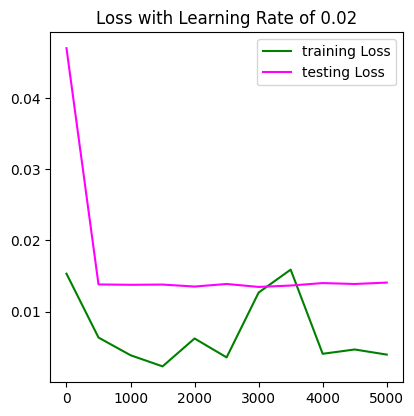

In [ ]:
plt.figure(figsize=(10, 10))
plt.title('Loss for optimizer - SGD')

plt.subplot(2,2,1)
plt.plot(epochs, np.array([item.detach().item() for item in training_loss]), color='green', label = 'training Loss')
plt.plot(epochs, np.array([item.detach().item() for item in testing_loss]), color='magenta', label = 'testing Loss')
plt.title('Loss with Learning Rate of 0.02')
plt.legend()

plt.show()

Problem 1.2

In [ ]:
modelSec = nn.Sequential(nn.Linear(training_X.shape[1], 32),
    nn.Tanh(),
    nn.Linear(32, 64),# Second hidden layer with 64 neurons
    nn.Tanh(),
    nn.Linear(64, 16), # Third hidden layer with 16 neurons
    nn.Tanh(),
    nn.Linear(16, 1) # Output layer with 1 neuron
).to(torch.float64)
criteria = nn.MSELoss()
optimizerSec = optim.SGD(modelSec.parameters(), lr=0.02)
training_lossSec, testing_lossSec = model_train(modelSec, nn.MSELoss(), optimizerSec, 5000, loading_trainSet, testing_X, testing_y)

Epoch 0/5000, Training Loss: 0.02030676367158376, Testing Loss: 0.057143116180951546
Epoch 500/5000, Training Loss: 0.00517059117104132, Testing Loss: 0.013056129484633541
Epoch 1000/5000, Training Loss: 0.0028714201806398316, Testing Loss: 0.013144907423085762
Epoch 1500/5000, Training Loss: 0.00496282133310082, Testing Loss: 0.013061804744700948
Epoch 2000/5000, Training Loss: 0.005302292833076663, Testing Loss: 0.012968624137741842
Epoch 2500/5000, Training Loss: 0.0034436039380514134, Testing Loss: 0.013229857010406045
Epoch 3000/5000, Training Loss: 0.005257890315529338, Testing Loss: 0.012921556657437078
Epoch 3500/5000, Training Loss: 0.004098333332323768, Testing Loss: 0.01287592100817009
Epoch 4000/5000, Training Loss: 0.00319179242039948, Testing Loss: 0.012670878949375814
Epoch 4500/5000, Training Loss: 0.004928639107166105, Testing Loss: 0.013155302907287125
Epoch 5000/5000, Training Loss: 0.0059539994263731215, Testing Loss: 0.012401441156933913


In [ ]:
for name, param in modelSec.named_parameters():
    print(f"Parameter name: {name}, Shape: {param.shape}")

Parameter name: 0.weight, Shape: torch.Size([32, 13])
Parameter name: 0.bias, Shape: torch.Size([32])
Parameter name: 2.weight, Shape: torch.Size([64, 32])
Parameter name: 2.bias, Shape: torch.Size([64])
Parameter name: 4.weight, Shape: torch.Size([16, 64])
Parameter name: 4.bias, Shape: torch.Size([16])
Parameter name: 6.weight, Shape: torch.Size([1, 16])
Parameter name: 6.bias, Shape: torch.Size([1])


In [ ]:
total_no_of_parameters= sum(p.numel() for p in modelSec.parameters() if p.requires_grad)
print("Total number of parameters that is trained ", total_no_of_parameters,  '\n')

Total number of parameters that is trained  3617 



<ipython-input-37-03913a257f10>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)


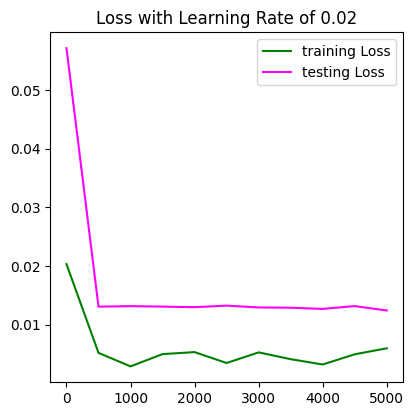

In [ ]:
plt.figure(figsize=(10, 10))
plt.title('Loss for optimizer - SGD')

plt.subplot(2,2,1)
plt.plot(epochs, np.array([item.detach().item() for item in training_lossSec]), color='green', label = 'training Loss')
plt.plot(epochs, np.array([item.detach().item() for item in testing_lossSec]), color='magenta', label = 'testing Loss')
plt.title('Loss with Learning Rate of 0.02')
plt.legend()

plt.show()

Problem 2

In [8]:
!pip install ipython-autotime
%load_ext autotime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.5 MB/s eta 0:00:00
time: 467 µs (started: 2024-08-01 00:12:57 +00:00)


In [9]:
from torchvision import datasets, transforms
from sklearn.metrics import classification_report

time: 1.01 ms (started: 2024-08-01 00:12:59 +00:00)


In [10]:
torch.manual_seed(123)

time: 21.1 ms (started: 2024-08-01 00:13:02 +00:00)


In [11]:
datasets_training = datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())

# Calculate mean and std
images = torch.stack([img_t for img_t, _ in datasets_training], dim=3)
mean = images.view(3, -1).mean(dim=1)
standard = images.view(3, -1).std(dim=1)

100%|██████████| 170498071/170498071 [00:02<00:00, 74080941.90it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
time: 37.8 s (started: 2024-08-01 00:13:04 +00:00)


In [12]:
mean

tensor([0.4914, 0.4822, 0.4465])

time: 44.6 ms (started: 2024-08-01 00:15:06 +00:00)


In [21]:
standard

tensor([0.2470, 0.2435, 0.2616])

time: 7.39 ms (started: 2024-08-01 00:15:57 +00:00)


In [22]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

time: 630 µs (started: 2024-08-01 00:15:59 +00:00)


In [23]:
device

device(type='cpu')

time: 4.03 ms (started: 2024-08-01 00:16:01 +00:00)


In [24]:
# Define transformation with calculated mean and std
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465),
                             (0.2470, 0.2435, 0.2616))
])

time: 821 µs (started: 2024-08-01 00:16:04 +00:00)


In [25]:
cifar10 = datasets.CIFAR10(
    './data', train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465),
                             (0.2470, 0.2435, 0.2616))
    ]))

time: 763 ms (started: 2024-08-01 00:16:08 +00:00)


In [26]:
cifar10_test = datasets.CIFAR10(
     './data', train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465),
                             (0.2470, 0.2435, 0.2616))
    ]))

time: 472 ms (started: 2024-08-01 00:16:13 +00:00)


In [27]:
first_image, label = cifar10[0]
print(first_image.shape)

torch.Size([3, 32, 32])
time: 16.7 ms (started: 2024-08-01 00:16:17 +00:00)


In [28]:
loading_training = DataLoader(cifar10, batch_size=32, shuffle=True, num_workers=2)
loading_testing = DataLoader(cifar10_test, batch_size=32, shuffle=False, num_workers=2)

time: 1.62 ms (started: 2024-08-01 00:16:19 +00:00)


In [29]:
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(32 * 32 * 3, 512),
    nn.Tanh(),
    nn.Linear(512, 10)
).to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

time: 21.3 ms (started: 2024-08-01 00:16:24 +00:00)


In [30]:
def train_model(model, train_loader, test_loader, num_epochs=300, lr=0.001):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Testing the model
        model.eval()
        correct = 0
        total = 0
        all_predicted = []
        all_labels = []

        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

                all_predicted.extend(predicted.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        accuracy = correct / total

        if epoch % 1 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}, Test Accuracy: {accuracy * 100:.2f}%')

    # Classification Report
    report = classification_report(all_labels, all_predicted)
    print("Classification Report:\n", report)

time: 5.5 ms (started: 2024-08-01 00:16:35 +00:00)


In [ ]:
train_model(model, loading_training, loading_testing, num_epochs=300, lr=0.01)

Epoch 1/300, Loss: 1.7887103070224315, Test Accuracy: 40.97%
Epoch 2/300, Loss: 1.6521615927141595, Test Accuracy: 43.16%
Epoch 3/300, Loss: 1.5804910740635751, Test Accuracy: 44.40%
Epoch 4/300, Loss: 1.519899311503461, Test Accuracy: 45.25%
Epoch 5/300, Loss: 1.4625943953306035, Test Accuracy: 46.40%
Epoch 6/300, Loss: 1.4085945383677174, Test Accuracy: 47.45%
Epoch 7/300, Loss: 1.3540482058482375, Test Accuracy: 47.09%
Epoch 8/300, Loss: 1.303205378224891, Test Accuracy: 47.25%
Epoch 9/300, Loss: 1.249423675177117, Test Accuracy: 48.28%
Epoch 10/300, Loss: 1.1991841589801981, Test Accuracy: 47.89%
Epoch 11/300, Loss: 1.1475233573297317, Test Accuracy: 48.38%
Epoch 12/300, Loss: 1.095942891376261, Test Accuracy: 49.02%
Epoch 13/300, Loss: 1.046086595253691, Test Accuracy: 48.78%
Epoch 14/300, Loss: 0.9944141276814735, Test Accuracy: 48.09%
Epoch 15/300, Loss: 0.9467172432960186, Test Accuracy: 48.02%
Epoch 16/300, Loss: 0.8975228103817996, Test Accuracy: 47.96%
Epoch 17/300, Loss: 0.

In [31]:
modelSec = nn.Sequential(
    nn.Flatten(),
    nn.Linear(32 * 32 * 3, 512),
    nn.Tanh(),
    nn.Linear(512, 256),
    nn.Tanh(),
    nn.Linear(256, 128),
    nn.Tanh(),
    nn.Linear(128, 10)
).to(device)

time: 38 ms (started: 2024-08-01 00:16:41 +00:00)


In [32]:
train_model(modelSec, loading_training, loading_testing, num_epochs=300, lr=0.01)

Epoch 1/300, Loss: 1.8526308091115433, Test Accuracy: 39.39%
Epoch 2/300, Loss: 1.6877098461793008, Test Accuracy: 42.08%
Epoch 3/300, Loss: 1.614415812248308, Test Accuracy: 44.02%
Epoch 4/300, Loss: 1.550810248288907, Test Accuracy: 45.39%
Epoch 5/300, Loss: 1.4962436543087585, Test Accuracy: 46.66%
Epoch 6/300, Loss: 1.4388082336708283, Test Accuracy: 46.50%
Epoch 7/300, Loss: 1.3862188074425559, Test Accuracy: 46.53%
Epoch 8/300, Loss: 1.3278557075496218, Test Accuracy: 47.02%
Epoch 9/300, Loss: 1.2728407922953424, Test Accuracy: 46.51%
Epoch 10/300, Loss: 1.2151350039590725, Test Accuracy: 48.67%
Epoch 11/300, Loss: 1.1560183316183181, Test Accuracy: 47.31%
Epoch 12/300, Loss: 1.0968976855583092, Test Accuracy: 47.44%
Epoch 13/300, Loss: 1.039191301537872, Test Accuracy: 47.30%
Epoch 14/300, Loss: 0.9764794598804859, Test Accuracy: 46.97%
Epoch 15/300, Loss: 0.9202850096247094, Test Accuracy: 47.74%
Epoch 16/300, Loss: 0.8621361962855053, Test Accuracy: 46.20%
Epoch 17/300, Loss: 

In [33]:
total_no_of_parameters = sum(p.numel() for p in modelSec.parameters() if p.requires_grad)
print("Total number of trainable parameters ", total_no_of_parameters,  '\n')

Total number of trainable parameters  1738890 

time: 2.88 ms (started: 2024-08-01 03:45:25 +00:00)
